In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip,os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import drive,files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/ExtraSensory.per_uuid_features_labels/'
csv_files = os.listdir(path)
dataset = pd.DataFrame()
for files in csv_files:
    df = pd.read_csv(os.path.join(path, files), compression='gzip')
    dataset= pd.concat([dataset, df], axis=0, ignore_index=True)
dataset = dataset.sample(frac=1, random_state=60)
training_dataset, test_csv = train_test_split(dataset, test_size=0.3, random_state=60)



In [4]:
print(len(csv_files))
print(len(training_dataset))
print(len(test_csv))



60
264142
113204


In [5]:
def create_model_sets(dataset, target_label):
    dataset = dataset.dropna(subset=[target_label])
    labels = dataset.filter(like="label").iloc[:, :-1]
    label_headers = labels.columns
    features = dataset.iloc[:, 1:-len(label_headers)]
    features_headers = features.columns
    time = dataset['timestamp'].iloc[0:]
    target_label_series = labels[target_label]
    tlabel_index = dataset.columns.get_loc(target_label)
    return features, features_headers, target_label_series, tlabel_index,time

In [6]:
def normalize_features(features):
  stat_values=features.describe()
  feature_mean=stat_values.loc['mean']
  imp_features=features.fillna(feature_mean)
  scaler=MinMaxScaler()
  features_scaled=scaler.fit_transform(imp_features)
  return features_scaled

In [7]:
def select_features(features,selected_f):
  filtered_df=pd.DataFrame()
  for list in selected_f:
    selected_features = features.filter(like=list, axis=1)
    filtered_df = pd.concat([filtered_df, selected_features], axis=1)
  return filtered_df.columns,filtered_df


In [8]:
train_features, train_feature_headers, train_label, train_label_index ,train_time= create_model_sets(training_dataset, 'label:SITTING')
f_feature_names,f_features=select_features(train_features,['location','discrete','lf_measurements:screen_brightness'])
print(f_feature_names)
X=normalize_features(f_features)
X_names=f_feature_names
Y=train_label
Y_names=train_label_index
T=train_time



Index(['location:num_valid_updates', 'location:log_latitude_range',
       'location:log_longitude_range', 'location:min_altitude',
       'location:max_altitude', 'location:min_speed', 'location:max_speed',
       'location:best_horizontal_accuracy', 'location:best_vertical_accuracy',
       'location:diameter', 'location:log_diameter',
       'location_quick_features:std_lat', 'location_quick_features:std_long',
       'location_quick_features:lat_change',
       'location_quick_features:long_change',
       'location_quick_features:mean_abs_lat_deriv',
       'location_quick_features:mean_abs_long_deriv',
       'discrete:app_state:is_active', 'discrete:app_state:is_inactive',
       'discrete:app_state:is_background', 'discrete:app_state:missing',
       'discrete:battery_plugged:is_ac', 'discrete:battery_plugged:is_usb',
       'discrete:battery_plugged:is_wireless',
       'discrete:battery_plugged:missing', 'discrete:battery_state:is_unknown',
       'discrete:battery_state:is_u

In [9]:

full_normalized={
    "timestamp":T }
full_X=pd.DataFrame(X,columns=X_names)
full_Y=pd.DataFrame({"SITTING":Y})
recon=pd.DataFrame(full_normalized)
recon = pd.concat([recon,full_X],axis=1)
recon = pd.concat([recon,full_Y],axis=1)
recon.describe()


,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:min_speed,location:max_speed,location:best_horizontal_accuracy,location:best_vertical_accuracy,...,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3,lf_measurements:screen_brightness,SITTING
count,2.145370e+05,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,...,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000,214537.000000
mean,1.445920e+09,0.071023,0.040303,0.042096,0.111089,0.074414,0.047012,0.031788,0.102037,0.040730,...,0.230007,0.213772,0.233027,0.270009,0.286049,0.278278,0.250917,0.275827,0.313776,0.445345
std,5.950979e+06,0.048603,0.075369,0.073288,0.044525,0.046112,0.066503,0.033810,0.107619,0.031600,...,0.420838,0.409969,0.422761,0.443965,0.451913,0.448152,0.433542,0.446931,0.219456,0.497005
min,1.433537e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.441656e+09,0.021186,0.006161,0.007434,0.108793,0.070523,0.047012,0.031788,0.018295,0.022603,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222229,0.000000
50%,1.445015e+09,0.071023,0.024199,0.027326,0.111089,0.074414,0.047012,0.031788,0.058930,0.040730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313776,0.000000
75%,1.448824e+09,0.114407,0.040303,0.042096,0.111089,0.074414,0.047012,0.031788,0.102037,0.040730,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.329843,1.000000
max,1.464899e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KeyboardInterrupt: ignored

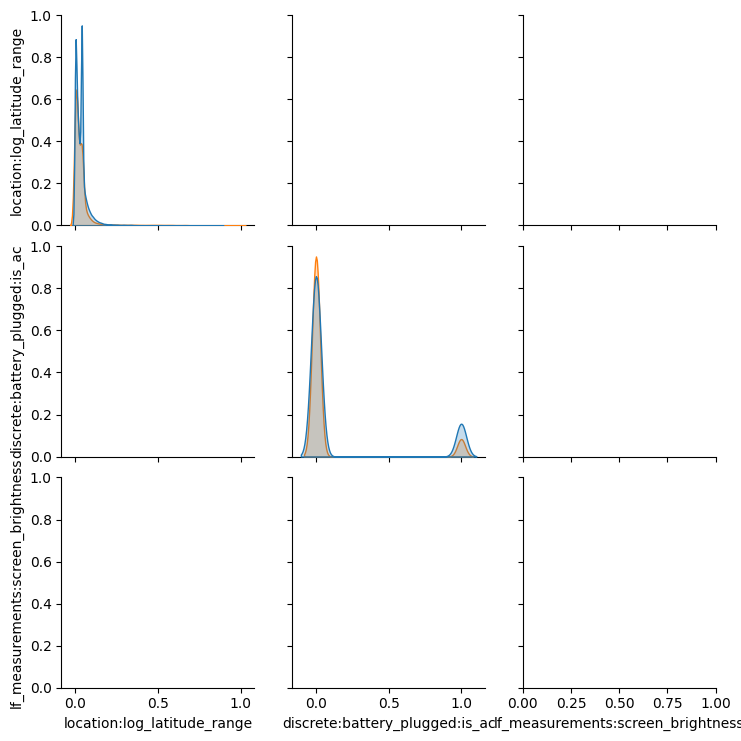

In [80]:
plotted_features ={
    X_names[1]:X[:,1],
    X_names[21]:X[:,21],
    X_names[51]:X[:,51],
    "SITTING":Y}
plotted_features=pd.DataFrame(plotted_features)
sns.pairplot(plotted_features,hue="SITTING")


In [12]:
test_features, test_feature_headers, test_label, test_label_index ,test_time= create_model_sets(test_csv, 'label:SITTING')
f_feature_names,f_features=select_features(test_features,['location','discrete','lf_measurements:screen_brightness'])
X_test=normalize_features(f_features)
X_test_names=f_feature_names
Y_test=test_label
Y_test_names=test_label_index
T_test=test_time


In [76]:
model = SGDClassifier(loss='log_loss', max_iter=1, random_state=80)
model.fit(X, Y)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (weights):", coefficients)
print("Intercept (bias):", intercept)

Coefficients (weights): [[-0.37779702 -2.02893269 -1.91113812  0.64616692  0.42736784  3.45267782
   5.92474538  1.13117906 -0.10125888  2.34084971  0.14059098  0.67324492
   0.58614041  0.3739372   0.22827754  0.32611387  0.26913554  0.02589658
   0.08413678 -0.2156579   0.65819659 -0.32441921  0.28825396  0.
   0.5887373   0.          0.70486229  0.54496953 -0.63315316  0.42848402
  -0.57918483  0.0865942   0.29410335  0.22813661  0.03033209  0.10641055
   0.35273022  0.17181139 -0.07838011  0.16124167  0.33555018  0.
   0.0557802  -1.3769462  -0.51646151  0.23910684  0.91413034  0.86368369
   0.79328677  0.82672771  0.51407731  0.51913267]]
Intercept (bias): [-3.14535117]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [77]:
print(len(f_feature_names))
predict=model.predict(X_test)
print((predict))
accuracy =accuracy_score(Y_test,predict)
precision =precision_score(Y_test,predict)
recall =recall_score(Y_test,predict)
f1 =f1_score(Y_test,predict)
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1: "+str(f1))

52
[0. 0. 1. ... 1. 1. 1.]
Accuracy: 0.7093865757085284
Precision: 0.6196555010893247
Recall: 0.8920196996055179
F1: 0.731301160046201


In [79]:
model2 = LogisticRegression(max_iter=1000,C=0.3)
model2.fit(X,Y)
predict2=model2.predict(X_test)
accuracyLR =accuracy_score(Y_test,predict2)
precisionLR =precision_score(Y_test,predict2)
recallLR =recall_score(Y_test,predict2)
f1LR =f1_score(Y_test,predict2)
print("Accuracy: "+str(accuracyLR))
print("Precision: "+str(precision))
print("Recall: "+str(recallLR))
print("F1: "+str(f1LR))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7153176836090683
Precision: 0.6196555010893247
Recall: 0.8008477690931811
F1: 0.7138255238760826
